In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
os.listdir('/kaggle/input/devanagari-character-dataset-large/')

['dhcd', 'dhcd.rar', 'labels.csv']

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [5]:
path = '../input/devanagari-character-dataset-large/dhcd'

In [6]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, train='train', valid='test', size=32, bs=32).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (78200 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
41,41,41,41,41
Path: ../input/devanagari-character-dataset-large/dhcd;

Valid: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
41,41,41,41,41
Path: ../input/devanagari-character-dataset-large/dhcd;

Test: None

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir='/tmp/model/')
#4 here is number of epochs
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.703453,1.125384,0.671304,04:07
1,0.695826,0.323739,0.902391,03:34
2,0.415073,0.182011,0.943913,03:40
3,0.365141,0.142100,0.954565,03:38


We will now see how the model has performed by plotting confusion matrix, we will also see few top losses and one of the most handy tools in fast.ai library “most_confused” which basically tells us where the model found the images most confusing while trainin

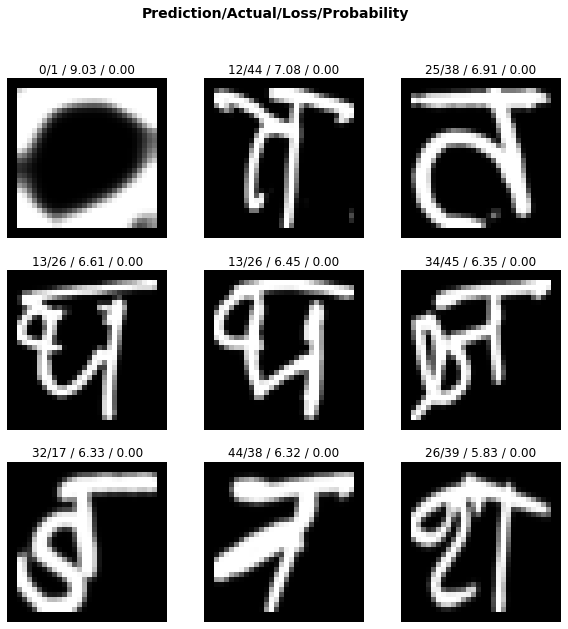

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(10,10))

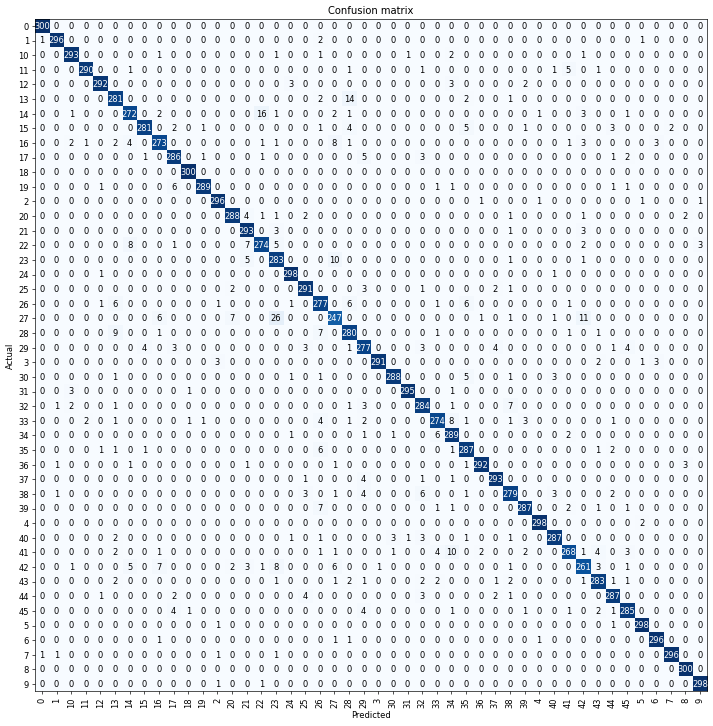

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

lets see where the model was most confused:

In [12]:
interp.most_confused(min_val=2)

[('27', '23', 26),
 ('14', '22', 16),
 ('13', '28', 14),
 ('27', '42', 11),
 ('23', '27', 10),
 ('41', '34', 10),
 ('28', '13', 9),
 ('16', '27', 8),
 ('22', '14', 8),
 ('33', '34', 8),
 ('42', '23', 8),
 ('22', '21', 7),
 ('27', '20', 7),
 ('28', '26', 7),
 ('32', '38', 7),
 ('39', '26', 7),
 ('42', '16', 7),
 ('19', '17', 6),
 ('26', '13', 6),
 ('26', '28', 6),
 ('26', '35', 6),
 ('27', '16', 6),
 ('34', '33', 6),
 ('35', '26', 6),
 ('38', '32', 6),
 ('42', '27', 6),
 ('11', '41', 5),
 ('15', '35', 5),
 ('17', '29', 5),
 ('22', '23', 5),
 ('23', '21', 5),
 ('30', '35', 5),
 ('42', '14', 5),
 ('15', '28', 4),
 ('16', '14', 4),
 ('20', '21', 4),
 ('29', '15', 4),
 ('29', '37', 4),
 ('29', '45', 4),
 ('33', '26', 4),
 ('37', '29', 4),
 ('38', '29', 4),
 ('41', '33', 4),
 ('41', '43', 4),
 ('44', '25', 4),
 ('45', '17', 4),
 ('45', '29', 4),
 ('12', '24', 3),
 ('12', '34', 3),
 ('14', '42', 3),
 ('15', '44', 3),
 ('16', '42', 3),
 ('16', '6', 3),
 ('17', '32', 3),
 ('21', '23', 3),
 ('21

One of these confused pictures are as follows — 27 and 23

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))